###  1. Sentiment Analysis
Use the newsapi to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi.newsapi_client import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/abhilesh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("../../NEWS_API_KEY.txt")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
print(api_key)

d1cdf6a42add4f8a8d5cf8618e0255c9


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles["totalResults"]

7842

In [6]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

4963

In [7]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass
        
    return pd.DataFrame(sentiments)

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.5574,0.000,0.881,0.119,It was 8:45 in the morning of June 13 when Bil...
1,0.0000,0.000,1.000,0.000,"Tools to trace cryptocurrencies have, over jus..."
2,0.5994,0.034,0.835,0.130,You gotta hand it to some people for being imp...
3,-0.5584,0.170,0.763,0.068,Cryptocurrencies are often criticized for bein...
4,0.2023,0.000,0.947,0.053,Elon Musk-owned electric vehicle making compan...
...,...,...,...,...,...
95,0.1280,0.000,0.957,0.043,"SAO PAULO, July 25 (Reuters) - Mexican cryptoc..."
96,-0.2960,0.156,0.722,0.122,Aug 2 (Reuters) - A U.S. judge on Tuesday gran...
97,0.1779,0.000,0.954,0.046,A look at the day ahead in markets from Alun J...
98,0.3400,0.000,0.936,0.064,Elon Musk's diamond hands have turned to paper...


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,-0.5584,0.170,0.763,0.068,Cryptocurrencies are often criticized for bein...
1,-0.0217,0.051,0.901,0.048,The non-fungible token\r\n (NFT) market has fa...
2,-0.2732,0.115,0.827,0.059,"It's a day of the week ending in the letter ""y..."
3,-0.1531,0.045,0.955,0.000,"Less than two weeks into its soft launch, Game..."
4,0.2023,0.000,0.952,0.048,"The Ethereum Merge is significant, and not jus..."
...,...,...,...,...,...
95,0.0000,0.000,1.000,0.000,The price of Ethereum(ETH -4.45%) has been soa...
96,0.0000,0.000,1.000,0.000,Jury vote eliminated\r\nSites are sent to a mi...
97,0.3975,0.032,0.892,0.076,Today I read a Nat Eliason post titled Does Cr...
98,0.0000,0.000,1.000,0.000,What happened\r\nCryptocurrency Ethereum Class...


In [10]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.054460,0.052510,0.880840,0.066630
std,0.458111,0.073051,0.090095,0.071798
min,-0.908100,0.000000,0.628000,0.000000
25%,-0.301550,0.000000,0.825250,0.000000
50%,0.000000,0.000000,0.881500,0.058000
75%,0.378825,0.102250,0.949000,0.115750
max,0.924600,0.307000,1.000000,0.372000


In [11]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.146437,0.041290,0.885040,0.073690
std,0.451098,0.067399,0.086727,0.071754
min,-0.936600,0.000000,0.646000,0.000000
25%,-0.005425,0.000000,0.823500,0.000000
50%,0.172850,0.000000,0.893500,0.061000
75%,0.514625,0.056250,0.944000,0.119500
max,0.921600,0.354000,1.000000,0.299000


#### Questions:

##### Q: Which coin had the highest mean positive score?
A. Ethereum had the highest mean positive score of 0.073690.

##### Q: Which coin had the highest compound score?
A. Bitcoin had the highest compound score of 0.924600.

##### Q. Which coin had the highest positive score?
A. Bitcoin had the highest positive score of 0.372000.

###  2. Natural Language Processing
Tokenizer
In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in stop_words]
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.5574,0.000,0.881,0.119,It was 8:45 in the morning of June 13 when Bil...,"[wa, morning, june, bill, stewart, ceo, maineb..."
1,0.0000,0.000,1.000,0.000,"Tools to trace cryptocurrencies have, over jus...","[tools, trace, cryptocurrencies, last, several..."
2,0.5994,0.034,0.835,0.130,You gotta hand it to some people for being imp...,"[got, ta, hand, people, impetuous, even, face,..."
3,-0.5584,0.170,0.763,0.068,Cryptocurrencies are often criticized for bein...,"[cryptocurrencies, often, criticized, bad, pla..."
4,0.2023,0.000,0.947,0.053,Elon Musk-owned electric vehicle making compan...,"[elon, muskowned, electric, vehicle, making, c..."


In [16]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.5584,0.170,0.763,0.068,Cryptocurrencies are often criticized for bein...,"[cryptocurrencies, often, criticized, bad, pla..."
1,-0.0217,0.051,0.901,0.048,The non-fungible token\r\n (NFT) market has fa...,"[nonfungible, token, nft, market, ha, fallen, ..."
2,-0.2732,0.115,0.827,0.059,"It's a day of the week ending in the letter ""y...","[day, week, ending, letter, inevitably, mean, ..."
3,-0.1531,0.045,0.955,0.000,"Less than two weeks into its soft launch, Game...","[less, two, week, soft, launch, gamestops, nft..."
4,0.2023,0.000,0.952,0.048,"The Ethereum Merge is significant, and not jus...","[ethereum, merge, significant, people, crypto,..."


#### NGrams and Frequency Analysis
In this section you will look at the ngrams and word frequency for each coin.

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin.

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [19]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [20]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)

In [21]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('char', 99),
 ('bitcoin', 54),
 ('reuters', 32),
 ('cryptocurrency', 26),
 ('ha', 23),
 ('crypto', 23),
 ('year', 17),
 ('market', 16),
 ('july', 16),
 ('aug', 16)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 97),
 ('crypto', 30),
 ('ethereum', 19),
 ('us', 17),
 ('ha', 16),
 ('cryptocurrency', 16),
 ('market', 15),
 ('bitcoin', 14),
 ('investor', 13),
 ('cryptocurrencies', 11)]

#### Word Clouds
In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

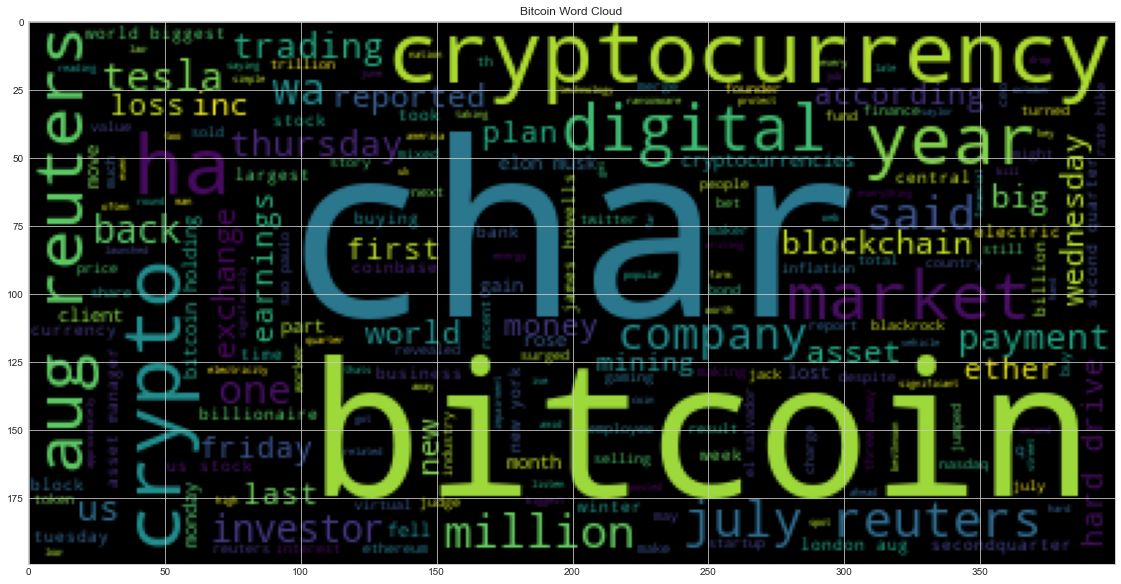

In [26]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud')

Text(0.5, 1.0, 'Ethereum Word Cloud')

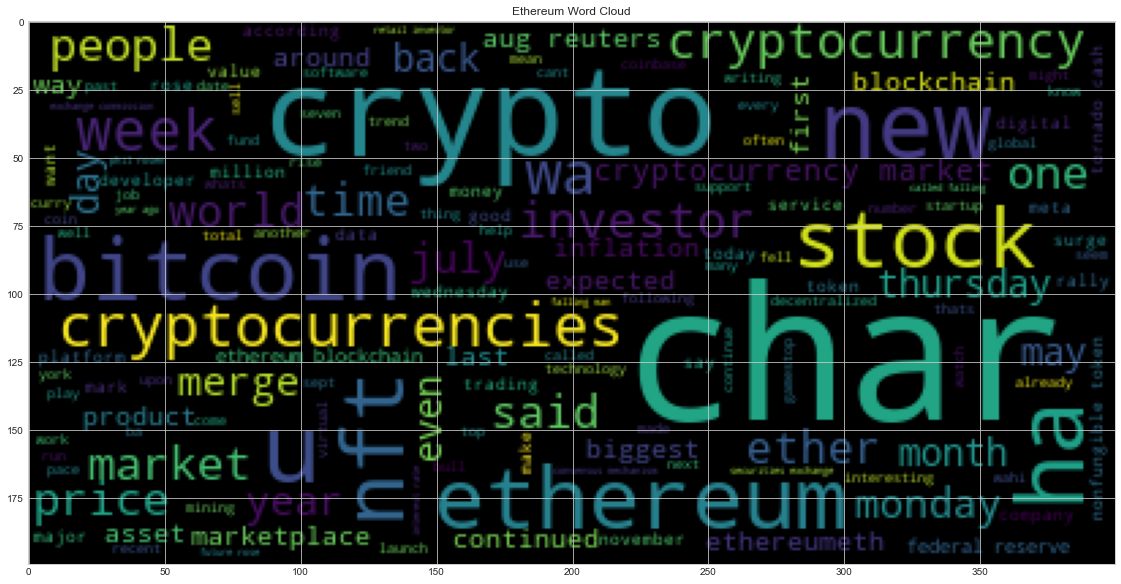

In [27]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud')

### 3. Named Entity Recognition
In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

#### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [32]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [35]:
# List all Entities
print([ent.label_ for ent in doc.ents])

['TIME', 'PERSON', 'GPE', 'ORG', 'DATE', 'CARDINAL', 'GPE', 'NORP', 'DATE', 'GPE', 'ORG', 'PERSON', 'ORG', 'NORP', 'CARDINAL', 'ORG', 'PERCENT', 'MONEY', 'CARDINAL', 'WORK_OF_ART', 'DATE', 'MONEY', 'PERCENT', 'DATE', 'ORG', 'DATE', 'ORG', 'MONEY', 'DATE', 'NORP', 'CARDINAL', 'MONEY', 'ORDINAL', 'DATE', 'GPE', 'DATE', 'PERCENT', 'MONEY', 'DATE', 'ORG', 'DATE', 'DATE', 'ORG', 'DATE', 'DATE', 'PERCENT', 'DATE', 'DATE', 'DATE', 'ORG', 'PERCENT', 'MONEY', 'WORK_OF_ART', 'DATE', 'MONEY', 'PERCENT', 'DATE', 'DATE', 'DATE', 'MONEY', 'DATE', 'MONEY', 'ORDINAL', 'ORG', 'GPE', 'ORG', 'DATE', 'GPE', 'DATE', 'ORG', 'DATE', 'ORG', 'ORG', 'PERCENT', 'ORG', 'CARDINAL', 'DATE', 'PERCENT', 'ORG', 'WORK_OF_ART', 'NORP', 'GPE', 'CARDINAL', 'DATE', 'GPE', 'DATE', 'MONEY', 'LOC', 'PERSON', 'ORG', 'PERSON', 'DATE', 'MONEY', 'DATE', 'ORG', 'ORDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'ORDINAL', 'ORG', 'ORG', 'ORG', 'ORG', 'ORG', 'NORP', 'DATE', 'PERSON', 'ORG', 'ORG', 'GPE', 'DATE', 'NORP', 'ORG', 'GPE', 'P

####  Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [37]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [38]:
# Render the visualization
displacy.render(doc, style='ent')

In [39]:
# List all Entities
print([ent.label_ for ent in doc.ents])

['DATE', 'GPE', 'ORG', 'ORG', 'ORG', 'DATE', 'ORG', 'ORG', 'CARDINAL', 'DATE', 'ORG', 'PERSON', 'WORK_OF_ART', 'DATE', 'PERSON', 'ORDINAL', 'ORG', 'ORG', 'PERSON', 'DATE', 'ORG', 'GPE', 'ORG', 'ORG', 'DATE', 'DATE', 'PERCENT', 'PERSON', 'PERSON', 'ORG', 'DATE', 'ORG', 'ORDINAL', 'ORG', 'ORG', 'DATE', 'PERSON', 'NORP', 'ORG', 'PERCENT', 'ORG', 'DATE', 'PERCENT', 'PERCENT', 'DATE', 'LOC', 'CARDINAL', 'QUANTITY', 'PERSON', 'DATE', 'PERSON', 'GPE', 'DATE', 'ORG', 'PERCENT', 'MONEY', 'WORK_OF_ART', 'DATE', 'MONEY', 'PERCENT', 'DATE', 'ORG', 'PERCENT', 'MONEY', 'CARDINAL', 'WORK_OF_ART', 'DATE', 'MONEY', 'PERCENT', 'ORG', 'DATE', 'ORG', 'ORG', 'GPE', 'DATE', 'ORG', 'MONEY', 'DATE', 'PERCENT', 'DATE', 'ORG', 'DATE', 'ORG', 'PERCENT', 'TIME', 'ORG', 'GPE', 'MONEY', 'ORG', 'PERSON', 'PERSON', 'ORG', 'LOC', 'PERSON', 'ORG', 'CARDINAL', 'GPE', 'ORG', 'DATE', 'MONEY', 'ORG', 'GPE', 'CARDINAL', 'ORG', 'ORG', 'DATE', 'GPE', 'ORDINAL', 'PERSON', 'ORG', 'PERSON', 'DATE', 'GPE', 'PERSON', 'ORG', 'PERSO